In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import eda.smoothing as eda_smt

In [12]:
df = pd.read_table("/workspaces/ST22-0424/Pengantar_Sains_Data/Week 5/braves.attendance.txt")
df

,Game,Attendance
0,1,320
1,2,261
2,3,332
3,4,378
4,5,341
...,...,...
67,68,295
68,69,299
69,70,435
70,71,489


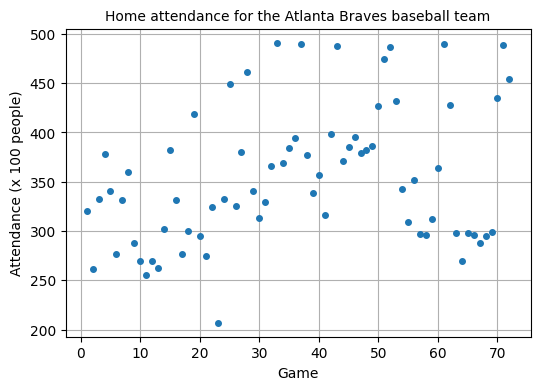

In [13]:
fig, ax = plt.subplots(figsize=[6, 4])

ax.plot(df["Game"], df["Attendance"], marker='o', linestyle="None",
        markersize=4)

ax.grid("on")
ax.set_xlabel("Game")
ax.set_ylabel("Attendance (x 100 people)")
ax.set_title("Home attendance for the Atlanta Braves baseball team",
            fontsize="medium")

plt.show(fig)

In [14]:
smooth3_noEnd = df["Attendance"].rolling(window=3, center=True).median()
smooth3_noEnd

0       NaN
1     320.0
2     332.0
3     341.0
4     341.0
      ...  
67    295.0
68    299.0
69    435.0
70    454.0
71      NaN
Name: Attendance, Length: 72, dtype: float64

In [29]:
eda_smt.apply_evs(df["Attendance"].to_list(), smooth3_noEnd)
eda_smt.apply_evs

KeyError: -2

In [16]:
df["Smooth3"] = eda_smt.apply_3(df["Attendance"].to_numpy())
df["Smooth3R"] = eda_smt.apply_3R(df["Attendance"].to_numpy())[1]
df

,Game,Attendance,Smooth3,Smooth3R
0,1,320,320.0,320.0
1,2,261,320.0,320.0
2,3,332,332.0,332.0
3,4,378,341.0,341.0
4,5,341,341.0,341.0
...,...,...,...,...
67,68,295,295.0,295.0
68,69,299,299.0,299.0
69,70,435,435.0,435.0
70,71,489,454.0,454.0


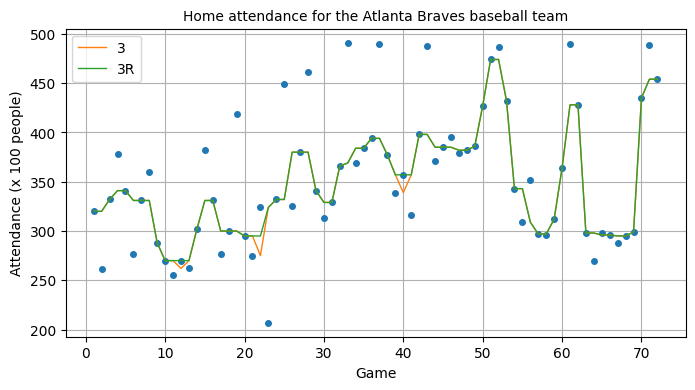

In [17]:
fig, ax = plt.subplots(figsize=[8, 4])

ax.plot(df["Game"], df["Attendance"], marker='o', linestyle="None",
        markersize=4, zorder=2, label=None)
ax.plot(df["Game"], df["Smooth3"], linestyle="-", linewidth=1, alpha=1,
        zorder=2, label="3")
ax.plot(df["Game"], df["Smooth3R"], linestyle="-", linewidth=1, alpha=1,
        zorder=3, label="3R")

ax.grid("on")
ax.set_xlabel("Game")
ax.set_ylabel("Attendance (x 100 people)")
ax.set_title("Home attendance for the Atlanta Braves baseball team",
             fontsize="medium")
ax.legend(loc="best")

plt.show(fig)

In [18]:
df["Smooth3RSS"] = eda_smt.apply_S(
 eda_smt.apply_S(
   df["Smooth3R"].to_numpy()))
df

,Game,Attendance,Smooth3,Smooth3R,Smooth3RSS
0,1,320,320.0,320.0,320.0
1,2,261,320.0,320.0,320.0
2,3,332,332.0,332.0,332.0
3,4,378,341.0,341.0,341.0
4,5,341,341.0,341.0,331.0
...,...,...,...,...,...
67,68,295,295.0,295.0,295.0
68,69,299,299.0,299.0,299.0
69,70,435,435.0,435.0,435.0
70,71,489,454.0,454.0,454.0


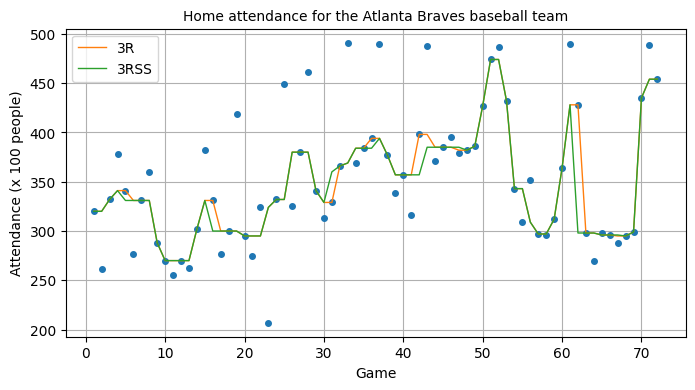

In [19]:
fig, ax = plt.subplots(figsize=[8, 4])

ax.plot(df["Game"], df["Attendance"], marker='o', 
      linestyle="None", markersize=4, zorder=2, label=None)
ax.plot(df["Game"], df["Smooth3R"], linestyle="-", 
      linewidth=1, alpha=1, zorder=3, label="3R") 
ax.plot(df["Game"], df["Smooth3RSS"], linestyle="-", 
      linewidth=1, alpha=1, zorder=3, label="3RSS")

ax.grid("on")
ax.set_xlabel("Game")
ax.set_ylabel("Attendance (x 100 people)")
ax.set_title("Home attendance for the Atlanta Braves baseball team",
            fontsize="medium")
ax.legend(loc="best")

plt.show(fig)

In [20]:
df["Smooth3RSSH"] = eda_smt.apply_H(df["Smooth3RSS"])
df

,Game,Attendance,Smooth3,Smooth3R,Smooth3RSS,Smooth3RSSH
0,1,320,320.0,320.0,320.0,320.00
1,2,261,320.0,320.0,320.0,323.00
2,3,332,332.0,332.0,332.0,331.25
3,4,378,341.0,341.0,341.0,336.25
4,5,341,341.0,341.0,331.0,333.50
...,...,...,...,...,...,...
67,68,295,295.0,295.0,295.0,296.25
68,69,299,299.0,299.0,299.0,332.00
69,70,435,435.0,435.0,435.0,405.75
70,71,489,454.0,454.0,454.0,449.25


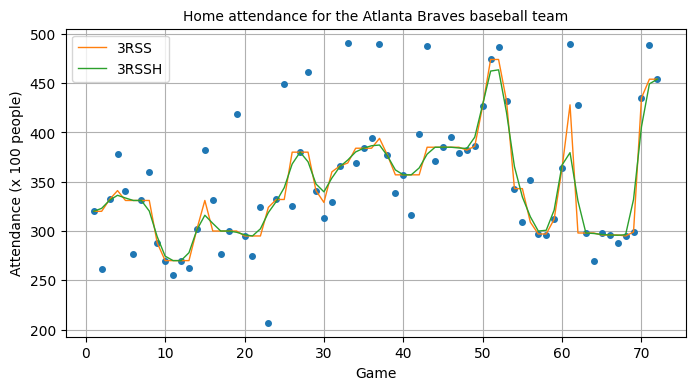

In [21]:
fig, ax = plt.subplots(figsize=[8, 4])

ax.plot(df["Game"], df["Attendance"], marker='o', linestyle="None",
        markersize=4, zorder=2, label=None)
ax.plot(df["Game"], df["Smooth3RSS"], linestyle="-", linewidth=1, 
        alpha=1, zorder=3, label="3RSS")
ax.plot(df["Game"], df["Smooth3RSSH"], linestyle="-", linewidth=1, 
        alpha=1, zorder=3, label="3RSSH")

ax.grid("on")
ax.set_xlabel("Game")
ax.set_ylabel("Attendance (x 100 people)")
ax.set_title("Home attendance for the Atlanta Braves baseball team",
            fontsize="medium")
ax.legend(loc="best")

plt.show(fig)

In [25]:
df["Smooth3RSSH.twice"] = eda_smt.apply_twice(
  df["Attendance"], df["Smooth3RSSH"], seq="3R_S_S_H")

KeyError: -1

KeyError: 'Smooth3RSSH.twice'

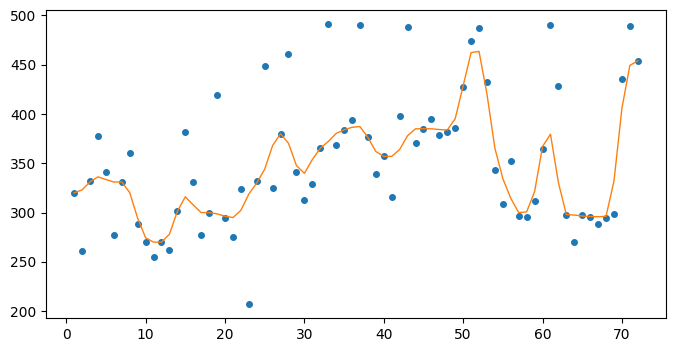

In [24]:
fig, ax = plt.subplots(figsize=[8, 4])

ax.plot(df["Game"], df["Attendance"], marker='o', linestyle="None",
        markersize=4, zorder=2, label=None)
ax.plot(df["Game"], df["Smooth3RSSH"], linestyle="-", linewidth=1, 
        alpha=1, zorder=3, label="3RSSH")
ax.plot(df["Game"], df["Smooth3RSSH.twice"], linestyle="-", linewidth=1, 
        alpha=1, zorder=3, label="3RSSH.twice")

ax.grid("on")
ax.set_xlabel("Game")
ax.set_ylabel("Attendance (x 100 people)")
ax.set_title("Home attendance for the Atlanta Braves baseball team",
            fontsize="medium")
ax.legend(loc="best")

plt.show(fig)

KeyError: 'Smooth3RSSH.twice'

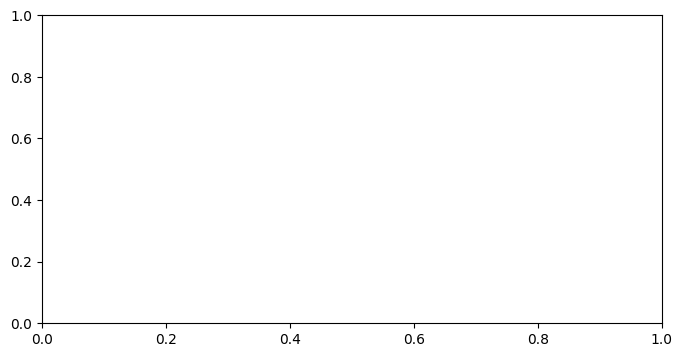

In [26]:
fig, ax = plt.subplots(figsize=[8, 4])

df["FinalRough"] = df["Attendance"] - df["Smooth3RSSH.twice"]
ax.plot(df["Game"], df["FinalRough"], marker='o', 
      linestyle="None", markersize=4, zorder=2, label=None)

ax.grid("on")
ax.set_xlabel("Game")
ax.set_ylabel("Final Rough (x 100 people)")
ax.set_title("Home attendance for the Atlanta Braves baseball team",
            fontsize="medium")

plt.show(fig)